In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras import optimizers


In [2]:
data = pd.read_csv("reliance_data.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


In [3]:

data['Date']=pd.to_datetime(data['Date']);

<ipython-input-3-27d8df80ce9e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date']=pd.to_datetime(data['Date']);


In [4]:

df = data.loc[data["Date"].dt.year==2020,:];
df.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02,2.300000e+02,230.000000
mean,1719.122391,1724.650217,1750.653043,1695.951957,1722.063913,1720.930000,1723.406565,1.844649e+07,3.172958e+15,4.054413e+05,5.665088e+06,0.329247
std,375.712569,378.727660,376.589171,376.610897,375.639812,375.721744,377.008872,1.093071e+07,2.070710e+15,2.183448e+05,3.242581e+06,0.117424
min,884.050000,916.200000,950.000000,875.650000,891.000000,884.050000,899.320000,2.411900e+06,4.838160e+14,9.948400e+04,6.214850e+05,0.114800
25%,1445.100000,1453.762500,1472.712500,1430.112500,1446.500000,1445.100000,1452.515000,1.145554e+07,1.880250e+15,2.658772e+05,3.241737e+06,0.238400
50%,1636.800000,1656.500000,1702.375000,1633.800000,1685.200000,1680.000000,1677.250000,1.568513e+07,2.720000e+15,3.490370e+05,5.036454e+06,0.307200
75%,2086.575000,2090.800000,2121.750000,2061.887500,2092.000000,2086.575000,2091.435000,2.275622e+07,3.714092e+15,5.020468e+05,7.181379e+06,0.407800
max,2324.550000,2325.000000,2369.350000,2310.550000,2324.900000,2324.550000,2339.460000,6.523089e+07,1.473430e+16,1.428490e+06,1.919505e+07,0.656700


In [5]:
candlestick = go.Candlestick( x=df.index,open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'])

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width=1100, height=600,
    title="Reliance, 2020",
    yaxis_title='Price')

fig.show()

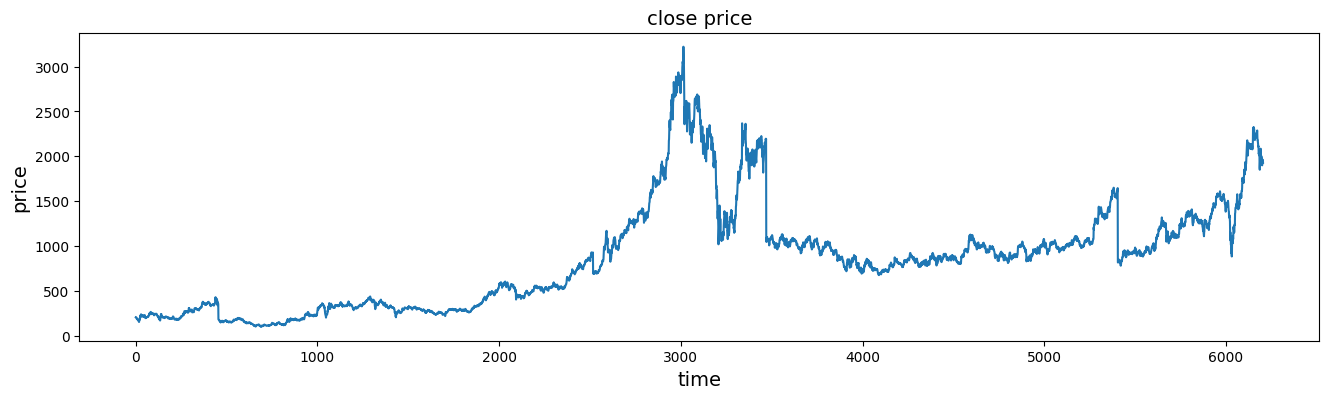

In [6]:
plt.figure(figsize=(16,4));
plt.title('close price',fontsize=14);
plt.plot(data.Close);
plt.xlabel('time',fontsize=14);
plt.ylabel('price',fontsize=14);

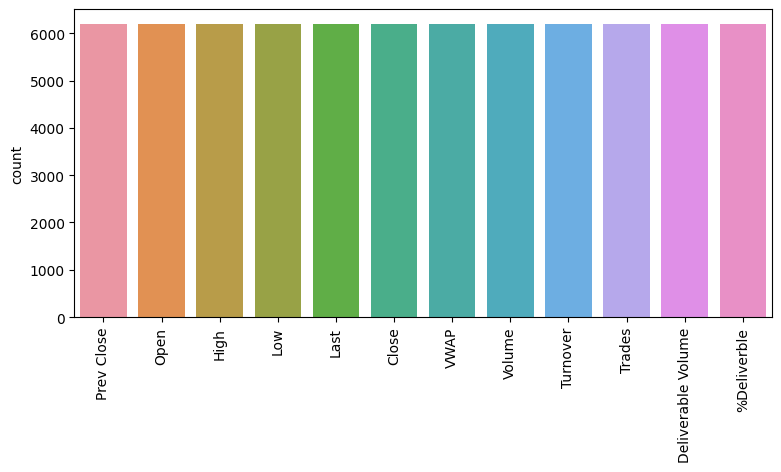

In [7]:
fig1, ax = plt.subplots(1,1,figsize=(9,4),dpi=100)
sns.countplot(data=data,ax=ax)
ax.tick_params(axis='x', rotation=90)

In [8]:

data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
data = data.drop(columns=['Symbol', 'Series', 'Last', 'Trades', 'Deliverable Volume','%Deliverble'], axis=1);
data = data[['Date','Prev Close','Open', 'High', 'Low', 'VWAP','Volume', 'Turnover','Close']];
data.head()


,Date,Prev Close,Open,High,Low,VWAP,Volume,Turnover,Close
0,1996-01-01,204.65,205.00,206.10,203.65,205.26,3717450,7.630000e+13,205.75
1,1996-02-01,205.75,205.25,206.25,202.65,204.13,6024650,1.230000e+14,204.15
2,1996-03-01,204.15,207.50,216.95,205.25,207.04,7473500,1.550000e+14,205.70
3,1996-04-01,205.70,203.75,204.40,201.05,202.47,7744000,1.570000e+14,203.80
4,1996-05-01,203.80,203.00,203.00,200.65,202.05,5952000,1.200000e+14,202.40


In [10]:
data.loc[5975,:]

Date          2020-01-01 00:00:00
Prev Close                1514.05
Open                       1518.0
High                       1527.1
Low                        1505.5
VWAP                      1515.23
Volume                    6402372
Turnover        970000000000000.0
Close                      1509.6
Name: 5975, dtype: object

In [11]:
data.loc[5974,:]

Date          2019-12-31 00:00:00
Prev Close                 1544.2
Open                       1542.0
High                       1543.7
Low                       1508.05
VWAP                      1525.14
Volume                   10150467
Turnover       1550000000000000.0
Close                     1514.05
Name: 5974, dtype: object

In [12]:
data = data.drop(columns=['Date'], axis=1);\
data.info

<bound method DataFrame.info of       Prev Close     Open     High      Low     VWAP    Volume      Turnover  \
0         204.65   205.00   206.10   203.65   205.26   3717450  7.630000e+13   
1         205.75   205.25   206.25   202.65   204.13   6024650  1.230000e+14   
2         204.15   207.50   216.95   205.25   207.04   7473500  1.550000e+14   
3         205.70   203.75   204.40   201.05   202.47   7744000  1.570000e+14   
4         203.80   203.00   203.00   200.65   202.05   5952000  1.200000e+14   
...          ...      ...      ...      ...      ...       ...           ...   
6200     1899.50  1951.00  1970.00  1926.25  1952.18  20918665  4.083700e+15   
6201     1950.70  1964.00  1974.00  1932.00  1952.11  14277083  2.787040e+15   
6202     1964.05  1980.00  1992.95  1942.20  1969.06  15062376  2.965870e+15   
6203     1947.80  1953.05  1965.00  1930.05  1946.67  11924527  2.321310e+15   
6204     1952.60  1940.50  1956.10  1921.40  1935.45  21845931  4.228160e+15   

       

In [13]:
scaler = MinMaxScaler(feature_range=(0,1));
dataset = data.values.astype('float32')
dataset.shape

(6205, 8)

In [14]:
scaled1 = scaler.fit_transform(dataset[0:5974,:]); # Years until 2019
scaled2 = scaler.fit_transform(dataset[5974:6205,:]); # Year 2020
scaled1.shape

(5974, 8)

In [15]:
scaled2.shape

(231, 8)

In [16]:
scaled  = np.concatenate((scaled1, scaled2), axis=0);
scaled.shape


(6205, 8)

In [17]:
X_train = scaled[0:5974,0:-1];
X_train.shape

(5974, 7)

In [18]:
X_test = scaled[5974:-1,0:-1];
X_test.shape

(230, 7)

In [21]:
Y_train = scaled[0:5974,-1];
Y_true  = scaled[5974:-1,-1];

In [22]:
Y_train.shape,Y_true.shape

((5974,), (230,))

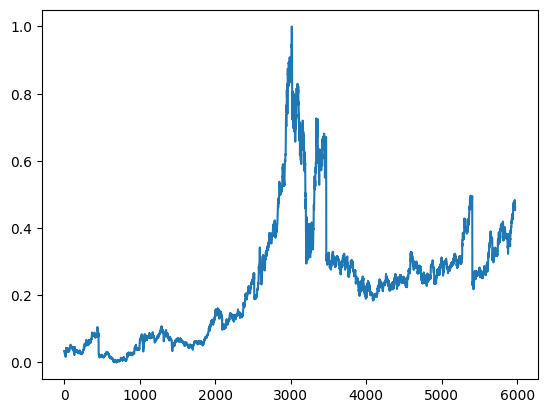

In [23]:
plt.plot(Y_train)

In [24]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1));
X_train.shape

(5974, 7, 1)

In [25]:
X_test = np.array(X_test);
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1));
X_test.shape

(230, 7, 1)

In [26]:
LSTM_model = Sequential();
LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(7, 1)))
LSTM_model.add(LSTM(units=50, return_sequences=False))
LSTM_model.add(Dense(25, activation='sigmoid'))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1, activation='sigmoid'))

In [27]:
LSTM_model.compile(loss = 'mean_squared_error',optimizer = 'adam');


Epoch 1/5
598/598 [==============================] - 13s 12ms/step - loss: 0.0133 - val_loss: 0.0025
Epoch 2/5
598/598 [==============================] - 5s 9ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/5
598/598 [==============================] - 7s 12ms/step - loss: 9.1840e-04 - val_loss: 0.0011
Epoch 4/5
598/598 [==============================] - 6s 10ms/step - loss: 8.5898e-04 - val_loss: 0.0026
Epoch 5/5
598/598 [==============================] - 8s 14ms/step - loss: 8.2347e-04 - val_loss: 0.0015


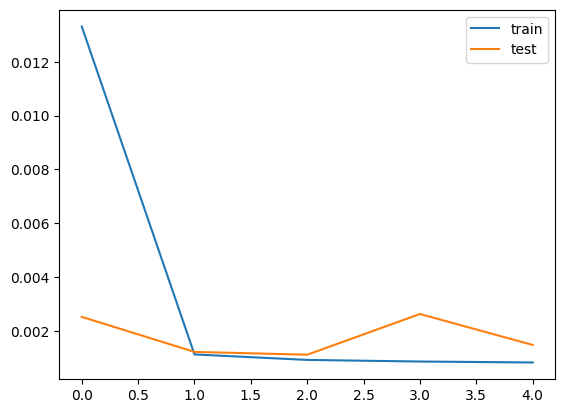

In [28]:
history = LSTM_model.fit(X_train,Y_train,batch_size = 10,epochs = 5,validation_data=(X_test, Y_true));
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='test');
plt.legend();

In [29]:
y_pred   = LSTM_model.predict(X_test);

8/8 [==============================] - 1s 3ms/step


In [30]:
X_test   = X_test.reshape(X_test.shape[0],X_test.shape[1]);
datafwd  = np.concatenate((X_test, y_pred), axis=1);
inv_data = scaler.inverse_transform(datafwd);
ypred    = inv_data[:,-1];

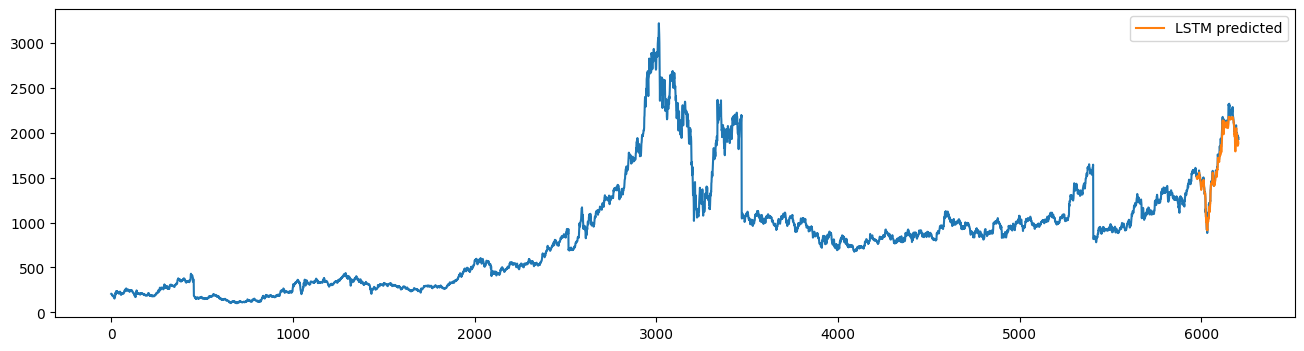

In [31]:
plt.figure(figsize=(16,4));
plt.plot(data.Close);
index_2020 = list(range(5974,6204));
plt.plot(index_2020,ypred,label='LSTM predicted');
plt.legend();

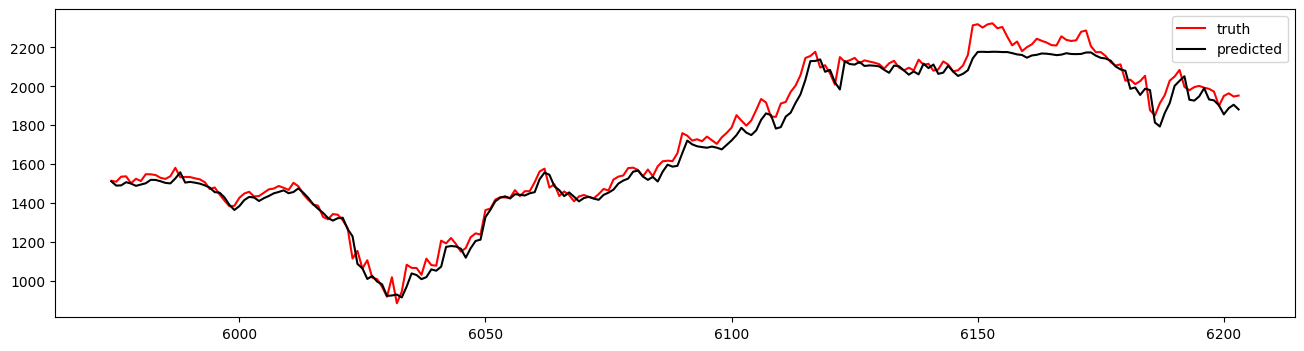

In [32]:
plt.figure(figsize=(16,4));
plt.plot(data.Close[5974:6204],'r',label='truth');
index_2020 = list(range(5974,6204));
plt.plot(index_2020,ypred,'k',label='predicted');
plt.legend()
